Number of classes: 7
Images shape: (1288, 50, 37)
Number of samples: 1288
Extracting the top 150 eigenfaces from 966 faces
Classification report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.62      0.73        13
     Colin Powell       0.66      0.95      0.78        60
  Donald Rumsfeld       0.84      0.59      0.70        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.95      0.84      0.89        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.96      0.75      0.84        36

         accuracy                           0.84       322
        macro avg       0.89      0.73      0.78       322
     weighted avg       0.86      0.84      0.84       322

Confusion matrix:
[[  8   3   0   2   0   0   0]
 [  1  57   1   1   0   0   0]
 [  0   6  16   5   0   0   0]
 [  0  11   0 134   0   0   1]
 [  0   1   0   3  21   0   0]
 [  0   5   0   2   1   7   0

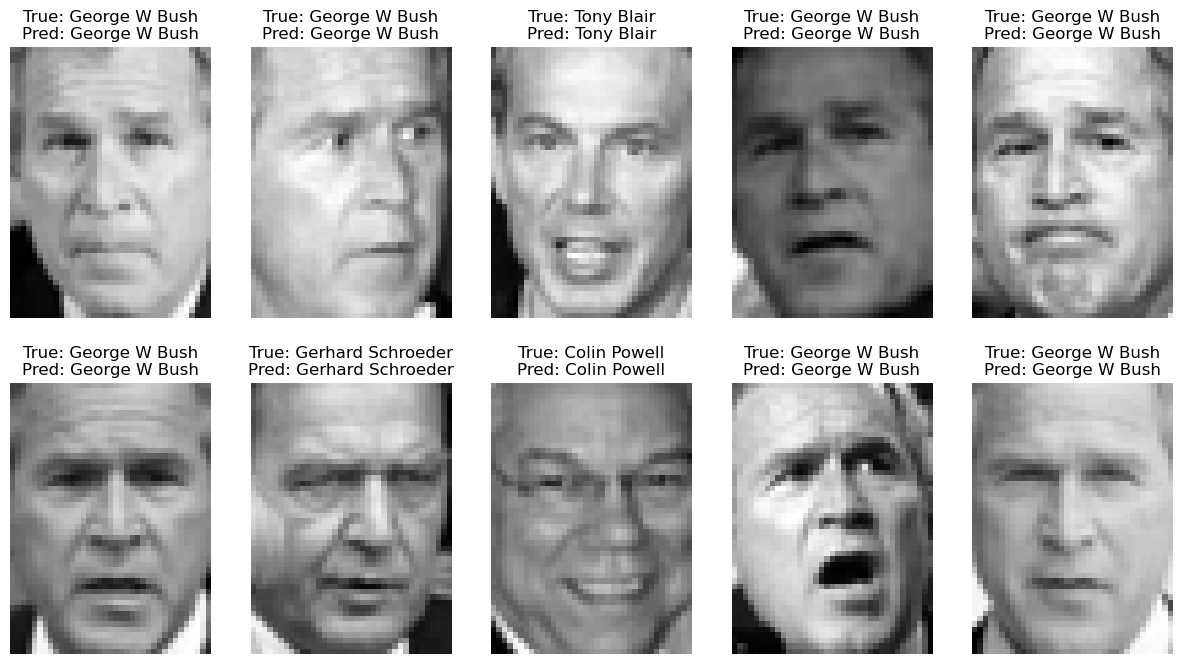

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Fetch the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Load the images and target labels
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

n_classes = target_names.shape[0]
print(f"Number of classes: {n_classes}")
print(f"Images shape: {lfw_people.images.shape}")
print(f"Number of samples: {X.shape[0]}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply PCA (Principal Component Analysis) for dimensionality reduction
n_components = 150
print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svc = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='auto')
svc.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test_pca)

# Display classification report and confusion matrix
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot some results
fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for i in range(10):
    ax[i // 5, i % 5].imshow(X_test[i].reshape(50, 37), cmap='gray')
    ax[i // 5, i % 5].set_title(f'True: {target_names[y_test[i]]}\nPred: {target_names[y_pred[i]]}')
    ax[i // 5, i % 5].axis('off')
plt.show()
